In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
from IPython.display import HTML, display
def display_table(headers, data):
    return display(HTML(
        '<table><tr>{}</tr><tr>{}</tr></table>'.format(
            ''.join('<th>{}</th>'.format(h) for h in headers),
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
            )
     ))

In [2]:
#some helper
def pad_one(A):
    A = np.array(A)
    if len(A.shape) == 1:
        A = A[:, None]
    return np.pad(A, ((0,0),(1,0)), 'constant', constant_values=1)
pad_one([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

array([[ 1,  1,  2,  3,  4],
       [ 1,  5,  6,  7,  8],
       [ 1,  9, 10, 11, 12]])

#### Rules

- Total score = 450 + 5
- Full score = 400
- Open everything but no communication. Just don't abuse your privilege.

# Problem 1 (100) 20 each

The following data is collected from Mahidol Farm. People are growing tree randomly so it's hard to tell which tree is which fruit. A student took the fruits and take note of the color and the taste then ask an expert what kind of fruit that is. He got the following Data.

He now want to put up a sign so that people who pick up random fruit from Mahidol Farm to figure out what kind of fruit give taste and color. Helps him make the sign by answering the following questions.

In [3]:
p1_data = np.array([
       ['sweet', 'red', 'peach'],
       ['sour', 'pink', 'peach'],
       ['sweet', 'pink', 'peach'],
       ['sour', 'red', 'peach'],
       ['sweet', 'white', 'peach'],
       ['sweet', 'red', 'apple'],
       ['sweet', 'red', 'apple'],
       ['sour', 'white', 'apple'],
       ['sour', 'pink', 'apple'],
       ['sweet', 'pink', 'apple'],
       ['sour', 'red', 'apple'],
       ['sweet', 'pink', 'apple']], 
      dtype='|S5')
display_table(['flavor','color', 'class'], p1_data)

flavor,color,class
sweet,red,peach
sour,pink,peach
sweet,pink,peach
sour,red,peach
sweet,white,peach
sweet,red,apple
sweet,red,apple
sour,white,apple
sour,pink,apple
sweet,pink,apple


1) Which one is more useful for making the sign for passerby to determine from taste and color what kind of fruit it is?

- $P(red|apple)$
- $P(apple| red)$

2) Compute both values in 1)

3) Find the probablity that an unknown red and sweet fruit from Mahidol Farm is a peach.

4) CP Corporation later found that the fruit classifier he built for Mahidol Farm is pretty useful. So CP deploy this classifier at their farm as well. Except for the fact that CP yields is 80% peach and 20% apple.

What is the probability that unknown red and sweet fruit from CP farm is a peach?

5) You later find out that as the fruit grow older it becomes sweeter and more red as well. Does this finding invalidate your calculation in 2,3,4.

# Problem 2 (100)

1) (30)In linear regression which of the following is a sensible cost function(assuming that we are trying to minimize the cost).

Let $y$ be the actual data and $y'$ be the guess from your model.

- $p(y) = (y-y')^4$
- $q(y) = -(y-y')^4$
- $r(y) = (y-y')^3$
- $s(y) = -(y-y')^3$


2) (30)Comparing what you pick in 1 and our normal square loss $(y-y')^2$ which one is more sensitive to ourliers

3) (40)The least sqare fitting we learn in class is suited only if the uncertainties on each term are equal. Meaning that we care about how far the line is from each of the point equally.

Sometimes we do not want to do that. We want to care about certain data points more than others. This means that we need to modify our cost function to reflect the fact.

The data in the cell below is $xs$ and $ys$ which is collected data points.
The array $ws$ indicate how much you care about the given point relative to others. 

For example, `w[0]` is 1 while `w[99]` is 5. This means that we care about getting a good fit to the data point at `(xs[99], ys[99])` 5 times more than good fit to `(xs[0], ys[0])`

**Your task:** 
Come up with a suitable cost function and fit the points with $y = mx + c$. Make sure your fitting methods reflects the fact that we care about some points more than the others.

Show the graph and value of $m$ and $c$. Anything sensible goes.

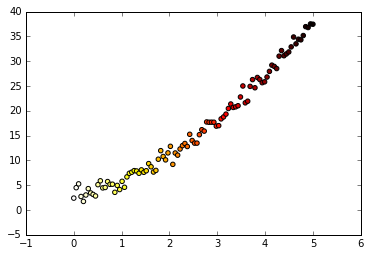

In [4]:
p2_xs, p2_ys = (np.array([ 0.        ,  0.05050505,  0.1010101 ,  0.15151515,  0.2020202 ,
         0.25252525,  0.3030303 ,  0.35353535,  0.4040404 ,  0.45454545,
         0.50505051,  0.55555556,  0.60606061,  0.65656566,  0.70707071,
         0.75757576,  0.80808081,  0.85858586,  0.90909091,  0.95959596,
         1.01010101,  1.06060606,  1.11111111,  1.16161616,  1.21212121,
         1.26262626,  1.31313131,  1.36363636,  1.41414141,  1.46464646,
         1.51515152,  1.56565657,  1.61616162,  1.66666667,  1.71717172,
         1.76767677,  1.81818182,  1.86868687,  1.91919192,  1.96969697,
         2.02020202,  2.07070707,  2.12121212,  2.17171717,  2.22222222,
         2.27272727,  2.32323232,  2.37373737,  2.42424242,  2.47474747,
         2.52525253,  2.57575758,  2.62626263,  2.67676768,  2.72727273,
         2.77777778,  2.82828283,  2.87878788,  2.92929293,  2.97979798,
         3.03030303,  3.08080808,  3.13131313,  3.18181818,  3.23232323,
         3.28282828,  3.33333333,  3.38383838,  3.43434343,  3.48484848,
         3.53535354,  3.58585859,  3.63636364,  3.68686869,  3.73737374,
         3.78787879,  3.83838384,  3.88888889,  3.93939394,  3.98989899,
         4.04040404,  4.09090909,  4.14141414,  4.19191919,  4.24242424,
         4.29292929,  4.34343434,  4.39393939,  4.44444444,  4.49494949,
         4.54545455,  4.5959596 ,  4.64646465,  4.6969697 ,  4.74747475,
         4.7979798 ,  4.84848485,  4.8989899 ,  4.94949495,  5.        ]),
 np.array([  2.39579127,   4.49755649,   5.26816245,   2.72017549,
          1.72849505,   3.02399993,   4.30519141,   3.43701317,
          3.14034762,   2.82885491,   5.10848835,   5.88529803,
          4.45497239,   4.54159617,   5.73202174,   5.1715863 ,
          5.19954643,   3.56399624,   4.9538986 ,   4.12442028,
          5.78167238,   4.58189422,   6.67214572,   7.3965165 ,
          7.61800549,   7.93645117,   7.86448065,   7.40851609,
          8.08799223,   7.60331804,   7.91351619,   9.35488837,
          8.71329524,   7.65491051,   7.98174755,  10.23702661,
         11.96599125,  10.7886753 ,  10.10568951,  11.51374552,
         12.83737667,   9.2000953 ,  11.49194511,  11.05758715,
         12.29968253,  12.97482823,  13.41001655,  12.80136323,
         15.26248627,  14.00977896,  13.48332036,  13.4842991 ,
         15.183488  ,  16.18648925,  15.90529304,  17.75066883,
         17.69368153,  17.70313916,  17.69553095,  16.91203306,
         17.00770352,  18.37066859,  18.76415281,  19.33095031,
         20.46429565,  21.36604963,  20.67620135,  20.79832955,
         21.02078035,  22.78499898,  25.00316485,  21.60300702,
         21.93230786,  24.92096088,  26.28857772,  24.64238443,
         26.72045983,  26.31222378,  25.66677084,  25.84105127,
         26.80680285,  27.94676291,  29.20540369,  28.94449156,
         28.51883131,  31.01660547,  32.13820897,  31.10216995,
         31.46666479,  31.85730903,  32.88471656,  34.87619035,
         33.49656516,  34.43555946,  34.30390557,  35.17325639,
         36.96765668,  36.78948892,  37.51011373,  37.45719103]))

p2_ws = np.array([ 1.        ,  1.04040404,  1.08080808,  1.12121212,  1.16161616,
        1.2020202 ,  1.24242424,  1.28282828,  1.32323232,  1.36363636,
        1.4040404 ,  1.44444444,  1.48484848,  1.52525253,  1.56565657,
        1.60606061,  1.64646465,  1.68686869,  1.72727273,  1.76767677,
        1.80808081,  1.84848485,  1.88888889,  1.92929293,  1.96969697,
        2.01010101,  2.05050505,  2.09090909,  2.13131313,  2.17171717,
        2.21212121,  2.25252525,  2.29292929,  2.33333333,  2.37373737,
        2.41414141,  2.45454545,  2.49494949,  2.53535354,  2.57575758,
        2.61616162,  2.65656566,  2.6969697 ,  2.73737374,  2.77777778,
        2.81818182,  2.85858586,  2.8989899 ,  2.93939394,  2.97979798,
        3.02020202,  3.06060606,  3.1010101 ,  3.14141414,  3.18181818,
        3.22222222,  3.26262626,  3.3030303 ,  3.34343434,  3.38383838,
        3.42424242,  3.46464646,  3.50505051,  3.54545455,  3.58585859,
        3.62626263,  3.66666667,  3.70707071,  3.74747475,  3.78787879,
        3.82828283,  3.86868687,  3.90909091,  3.94949495,  3.98989899,
        4.03030303,  4.07070707,  4.11111111,  4.15151515,  4.19191919,
        4.23232323,  4.27272727,  4.31313131,  4.35353535,  4.39393939,
        4.43434343,  4.47474747,  4.51515152,  4.55555556,  4.5959596 ,
        4.63636364,  4.67676768,  4.71717172,  4.75757576,  4.7979798 ,
        4.83838384,  4.87878788,  4.91919192,  4.95959596,  5.        ])

plt.scatter(p2_xs, p2_ys, c=p2_ws, cmap='hot_r')

# Problem 3 (100) 25 each

1) Consider the following two data points:
- $(x_1,x_2) = (1,2)$ of class $-1$
- $(x_1,x_2) = (-1,1)$ of class $+1$

Suppose that we are considering between two logistic models with different weight vectors ($\vec{w}$)
- $\vec{u} = (0,0,1)$
- $\vec{v} = (1,1,2)$

Which one is a better model? Justify your answer with calculation

2) Suppose that we want to do a logistic regression with regularization.

$$cost(\vec{w}) = -\frac{1}{n}\sum_i \ln(\theta(y^{(i)}w \cdot x^{(i)})) + \lambda \sum_{j=1} w_j^2$$

where $x^{i}$ is polynomial of a very high degree (eg: $[1, x, x^2, \cdots, x^{30}]$.


**Your task**

a) In a sepearate sheet of paper sketch the graph of error vs $\lambda$ for

- Error you expected to see in training set $E_{in}$
- Error you expected to see when applying it to real world data $E_{out}$


b) Indicate the $\lambda$ you want to use in the graph.

Be sure to indicate which side is high $\lambda$ and which side is low $\lambda$







3) The following plot is the plot of false negative rate(x-axis) vs false positive rate(y-axis). Which corner would a good classifier lies.

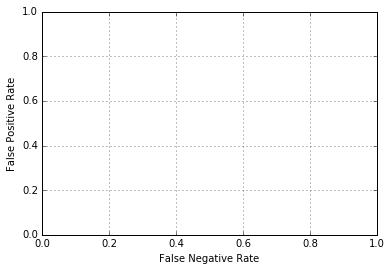

In [5]:
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Negative Rate')
plt.ylabel('False Positive Rate')
plt.grid()

4) The following plot is a plot of True Positive Rate and True Negative Rate. The <span style="color: blue">blue line</span> in the graph below is ROC plot of the classifier you just created against **training** data.

If the classifier your build is **overfitting** where would the ROC plot of the same classifier against **validation** dataset lies? (red, blue, or green) justify your answer.

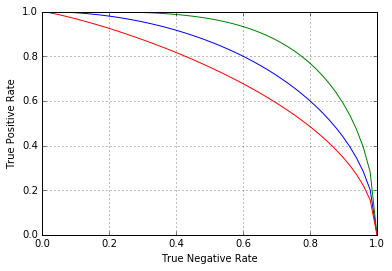

In [6]:
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.grid()
p3_xs = np.linspace(0,1,50)
p3_ys = np.sqrt(1-p3_xs**2)
plt.plot(p3_xs, p3_ys)
p3_ys = np.sqrt(1-(p3_xs)**4)
plt.plot(p3_xs, p3_ys)
p3_ys = np.sqrt(1-(p3_xs)**1.2)
plt.plot(p3_xs, p3_ys)

# Problem 4

Consider the following data:
- the first column is feature 1 ($x_1$)
- the second column is feature 2 ($x_2$)
- the third column is the class

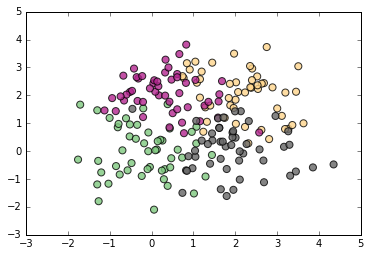

In [7]:
data = np.genfromtxt('p4data.txt')
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap='Accent', s=50, alpha=0.8)

1) (25) We want to build ECOC classifier for these 4 classes. Suppose that we want to use exhaustive matrix for this. Write down the code table.

2) (50) Build an ECOC classifier for these 4 classes and use to to classify $(x_1, x_2) = (2.5,-0.5)$ use logistic classifier you build in class for this. (Aka. Copy paste and change stuff so it works.)

3) (25) If we were to extends this to 1000 classes instead of 4. Should we use exhaustive matrix? Why?

# Problem 5 (50+5)

1) (50) Consider the following 800 classifiers(Hint don't do this by hands). Which one performs the best on this data? Tell me the index of the best one and the performance. Explain what you did as well. Anything I deem sensible goes.

In [8]:
import math
class OneLineClassifier:
    def __init__(self, theta, c, sign):
        self.theta = theta
        self.c = c
        self.sign = sign
    def classify(self, x, y):
        return 1 if self.sign*(x*math.sin(self.theta) + y*math.cos(self.theta) + self.c) > 0 else 0
thetas = np.linspace(0,2*math.pi,20)
cs = np.linspace(-1,1,20)
signs = [-1,+1]
classifiers = [OneLineClassifier(theta, c, sign) for theta in thetas for c in cs for sign in signs]

In [9]:
#this is an example of how you use OneLineClassifier to classify point (1,2)
classifiers[0].classify(1,2)

0

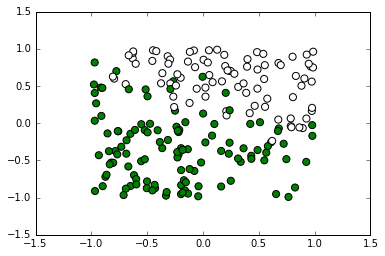

In [10]:
p5_data = np.genfromtxt('p5data.txt')
#1st and 2nd column are features
#3rd column is the class
plt.scatter(p5_data[:,0], p5_data[:,1], c=p5_data[:,2], cmap='ocean', s=50)

2) Bonus +(5) Explain intuitively what exactly that one magical looking line in classify does.